# 회귀모델 실습

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [58]:
# 분석 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn import ensemble

In [54]:
# 시각화 라이브러리 선언
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

### 데이터 불러오기

In [5]:
featuresData = \
    pd.read_csv("../dataset/feature_regression_example.csv")

In [6]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


### 1. 타입 통합 / 특성 숫자컬럼 추가

#### 1-1 타입 통합

In [7]:
featuresData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGIONID      105 non-null    object 
 1   PRODUCTGROUP  105 non-null    object 
 2   PRODUCT       105 non-null    object 
 3   ITEM          105 non-null    object 
 4   YEARWEEK      105 non-null    int64  
 5   YEAR          105 non-null    int64  
 6   WEEK          105 non-null    int64  
 7   QTY           105 non-null    int64  
 8   HOLIDAY       105 non-null    object 
 9   HCLUS         105 non-null    int64  
 10  PROMOTION     105 non-null    object 
 11  PRO_PERCENT   105 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 10.0+ KB


In [8]:
featuresData["YEARWEEK"] = featuresData.YEARWEEK.astype(int)
featuresData["YEAR"] = featuresData.YEAR.astype(int)
featuresData["WEEK"] = featuresData.WEEK.astype(int)

In [9]:
featuresData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGIONID      105 non-null    object 
 1   PRODUCTGROUP  105 non-null    object 
 2   PRODUCT       105 non-null    object 
 3   ITEM          105 non-null    object 
 4   YEARWEEK      105 non-null    int32  
 5   YEAR          105 non-null    int32  
 6   WEEK          105 non-null    int32  
 7   QTY           105 non-null    int64  
 8   HOLIDAY       105 non-null    object 
 9   HCLUS         105 non-null    int64  
 10  PROMOTION     105 non-null    object 
 11  PRO_PERCENT   105 non-null    float64
dtypes: float64(1), int32(3), int64(2), object(6)
memory usage: 8.7+ KB


#### 1-2 특성 숫자컬럼 추가

In [10]:
featuresData.HOLIDAY.drop_duplicates().shape[0]

2

In [11]:
# np.where
featuresData["HOLIDAY_YN"] = np.where(featuresData.HOLIDAY == "Y", 1, 0)

In [12]:
featuresData.PROMOTION.drop_duplicates().shape[0]

2

In [13]:
# np.where
featuresData["PROMOTION_YN"] = np.where(featuresData.PROMOTION == "Y", 1, 0)

### 2. 특성 선정 / 데이터 분리

#### 2-1 특성 선정

In [14]:
corrDf = featuresData.corr()

In [15]:
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [16]:
# 특성(fetures) 선정

In [17]:
featuresStd = 0.5

In [18]:
corrDf[(abs(corrDf.QTY) > featuresStd) & (corrDf.QTY != 1)]

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [19]:
features = list((corrDf[(abs(corrDf.QTY) > featuresStd) & (corrDf.QTY != 1)]).index)

In [20]:
features

['HCLUS', 'PRO_PERCENT', 'HOLIDAY_YN', 'PROMOTION_YN']

In [21]:
# 정답(label) 선정
label = ["QTY"]

#### 2-2 데이터 분리

In [22]:
# 데이터 조회
featuresData = featuresData.loc[(featuresData.YEARWEEK >= 201501) & (featuresData.YEARWEEK <= 201652)]

In [23]:
print(featuresData.YEARWEEK.min())
print(featuresData.YEARWEEK.max())

201501
201652


In [24]:
# training data & test data 분리
stdRatio = 0.8

In [25]:
sortKey = ["YEARWEEK"]

In [26]:
featuresData = featuresData.sort_values(sortKey).reset_index(drop=True)

In [27]:
featuresData.shape

(105, 14)

In [28]:
stdIndex = int(featuresData.shape[0] * stdRatio)
stdIndex

84

In [29]:
yearweekStd = featuresData.loc[stdIndex].YEARWEEK
yearweekStd

201632

In [30]:
trainingData_features = featuresData.loc[featuresData.YEARWEEK <= yearweekStd, features]
trainingData_label = featuresData.loc[featuresData.YEARWEEK <= yearweekStd, label]
testData_features = featuresData.loc[featuresData.YEARWEEK > yearweekStd, features]
testData_label = featuresData.loc[featuresData.YEARWEEK > yearweekStd, label]

In [31]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_label.shape)
print(testData_label.shape)

(85, 4)
(20, 4)
(85, 1)
(20, 1)


### 3. 모델 적용

#### 3-1 모델 선언 및 학습(Decision Tree)

In [32]:
# 모델 정의
modelMethod_Dt = tree.DecisionTreeRegressor(random_state=1)

In [33]:
# 머신러닝(훈련데이터 features/lable)
model_Dt = modelMethod_Dt.fit(trainingData_features, trainingData_label)

#### 3-2 모델 선언 및 학습(Linear Regression)

In [34]:
# 모델 정의
modelMethod_Lr = linear_model.LinearRegression()

In [35]:
# 머신러닝(훈련데이터 features/label)
model_Lr = modelMethod_Lr.fit(X=trainingData_features,
                              y=trainingData_label)

In [36]:
model_Lr.intercept_ # y절편

array([161.52703479])

In [37]:
model_Lr.coef_ # 계수

array([[  35.21375555, 6986.23920244,  469.14073342, -779.63362967]])

#### 3-3 모델 선언 및 학습(Random forest)

In [59]:
# 모델 정의
modelMethod_Rf = ensemble.RandomForestRegressor(random_state=3)

In [60]:
model_Rf = modelMethod_Rf.fit(X=trainingData_features,
                             y=trainingData_label)

C:\Users\ANJUNG~1\AppData\Local\Temp/ipykernel_2448/973066109.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Rf = modelMethod_Rf.fit(X=trainingData_features,


### 4. 모델 예측

#### 4-1 Decision Tree 모델 예측

In [38]:
predict_Dt = model_Dt.predict(testData_features)
predict_Dt

array([ 350.71428571, 1434.6       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       , 1708.75      , 1708.75      ,
       2620.42857143, 1708.75      ,  350.71428571, 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ])

#### 4-2 Linear Regression 모델 예측

In [39]:
predict_Lr = model_Lr.predict(testData_features)
predict_Lr

array([[ 302.382057  ],
       [2042.08737339],
       [2042.08737339],
       [2042.08737339],
       [1678.58790663],
       [1678.58790663],
       [1480.69443745],
       [1480.69443745],
       [1879.40765977],
       [1480.69443745],
       [ 302.382057  ],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2798.44750151],
       [2470.1617903 ],
       [1984.42327061],
       [1984.42327061],
       [2347.92273738]])

#### 4-3 Random forest

In [61]:
predict_Rf = model_Rf.predict(testData_features)
predict_Rf

array([ 347.9567046 , 1434.70414927, 1434.70414927, 1434.70414927,
       1502.09881349, 1502.09881349, 1745.57721825, 1745.57721825,
       2494.82571162, 1745.57721825,  347.9567046 , 2216.19854004,
       2216.19854004, 2216.19854004, 2216.19854004, 2216.19854004,
       1684.66885317, 1684.66885317, 1684.66885317, 1761.42586833])

### 5. 데이터 정리

#### 5-1 데이터 정리(Decision Tree)

In [40]:
# 예측결과를 데이터프레임으로 변환
predictData_Dt = pd.DataFrame(predict_Dt, columns=["PREDICT_DT"])

In [41]:
# 테스트데이터 정답지 인덱스 초기화
testData_label.reset_index(drop=True, inplace=True)

In [42]:
# 예측결과, 정답지 병합
testData = testData_label

In [43]:
testData["PREDICT_DT"] = predictData_Dt

In [44]:
list(testData.columns)

['QTY', 'PREDICT_DT']

In [45]:
testData.loc[:,["QTY","PREDICT_DT"]]

,QTY,PREDICT_DT
0,43,350.714286
1,1700,1434.600000
2,1514,1434.600000
3,1501,1434.600000
4,1491,1434.600000
5,806,1434.600000
6,2111,1708.750000
7,2400,1708.750000
8,2010,2620.428571
9,1900,1708.750000


#### 5-2 Linear Regression 데이터 정리

In [47]:
# 예측결과를 데이터프레임으로 변환
predictData_Lr = pd.DataFrame(predict_Lr, columns=["PREDICT_LR"])

In [49]:
# 예측결과, 정답지 병합

In [50]:
testData["PREDICT_LR"] = predictData_Lr

In [51]:
testData.loc[:,["QTY","PREDICT_LR"]]

,QTY,PREDICT_LR
0,43,302.382057
1,1700,2042.087373
2,1514,2042.087373
3,1501,2042.087373
4,1491,1678.587907
5,806,1678.587907
6,2111,1480.694437
7,2400,1480.694437
8,2010,1879.407660
9,1900,1480.694437


#### 5-3 데이터 정리(Random forest)

In [67]:
# 예측결과를 데이터프레임으로 변환
predictData_Rf = pd.DataFrame(predict_Rf, columns=["PREDICT_RF"])

In [68]:
testData["PREDICT_RF"] = predictData_Rf

In [69]:
testData.loc[:,["QTY","PREDICT_RF"]]

,QTY,PREDICT_RF
0,43,347.956705
1,1700,1434.704149
2,1514,1434.704149
3,1501,1434.704149
4,1491,1502.098813
5,806,1502.098813
6,2111,1745.577218
7,2400,1745.577218
8,2010,2494.825712
9,1900,1745.577218


### 6. 결과 검증

#### 6-1 Decision Tree 결과 검증

In [46]:
print("DT의 결과")
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["QTY"], y_pred=testData["PREDICT_DT"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_DT"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_DT"]))))

DT의 결과
MAE : 462.0403571428572
MSE : 373712.7075790817
RMSE : 611.3204622610646


#### 6-2 Linear Regression 결과 검증

In [53]:
print("LR의 결과")
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["QTY"], y_pred=testData["PREDICT_LR"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_LR"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_LR"]))))

LR의 결과
MAE : 625.4939825867218
MSE : 606053.6504984035
RMSE : 778.4944768579951


#### 6-3 Random Forest 결과 검증

In [70]:
print("LR의 결과")
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["QTY"], y_pred=testData["PREDICT_RF"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_RF"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["QTY"], y_pred=testData["PREDICT_RF"]))))

LR의 결과
MAE : 392.75241002195907
MSE : 252322.09006671896
RMSE : 502.31672286190013


### 7. 모델 시각화

#### 7-1. Decision Tree

In [104]:
features[1]

'PRO_PERCENT'

In [90]:
trainingData_features.shape[0]

85

In [99]:
trainingData_features.loc[trainingData_features.PRO_PERCENT <= 0.259].shape[0]

64

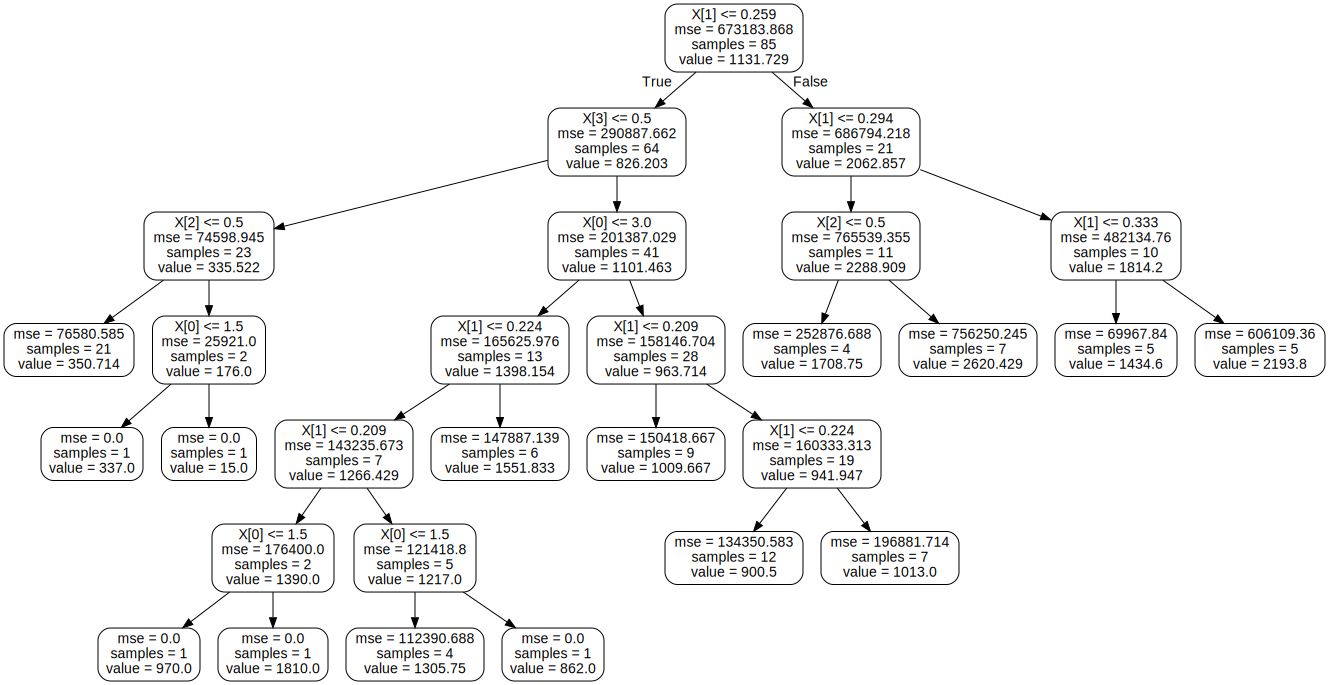

In [83]:
dot_data_DT = export_graphviz(decision_tree=model_Dt, rounded=True)
graph_DT = graphviz.Source(dot_data_DT, format="png")
graph_DT

In [82]:
## DT png 파일로 저장
graph_DT.render("dt_tree_DT", format="png")

'dt_tree_DT.png'

#### 7-2 Linear Regression 시각화

<AxesSubplot:xlabel='QTY', ylabel='PREDICT_LR'>

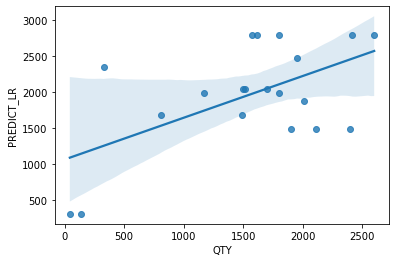

In [56]:
sns.regplot(x='QTY', y='PREDICT_LR', data = testData)

#### 7-3 Random Forest 시각화

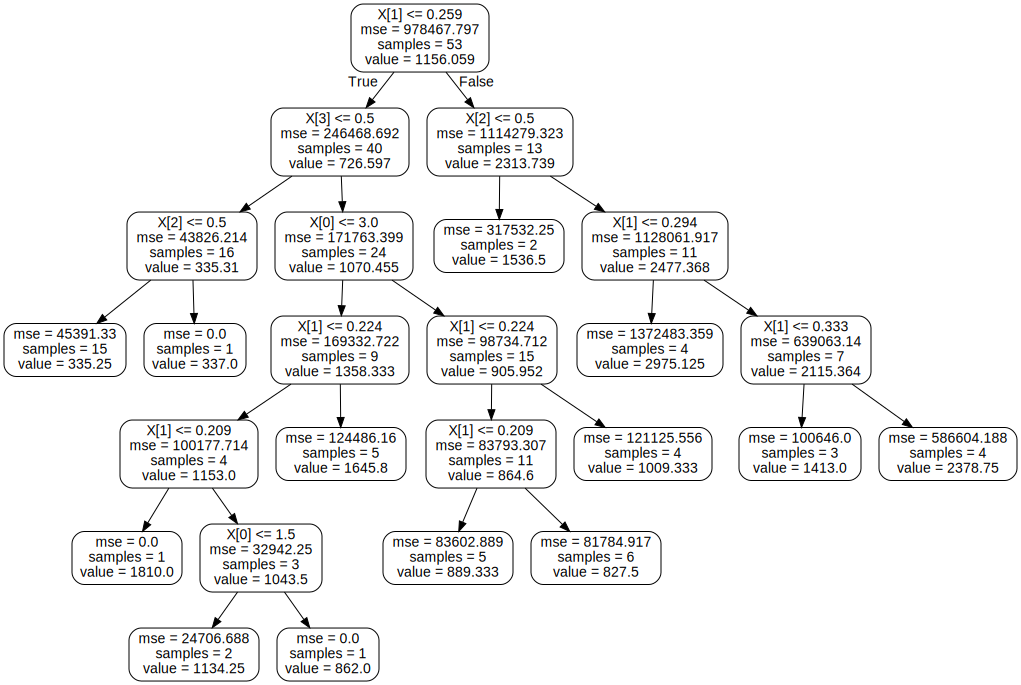

In [71]:
dot_data_RF = export_graphviz(decision_tree=model_Rf.estimators_[0],rounded=True)
graph_RF = graphviz.Source(dot_data_RF, format="png")
graph_RF

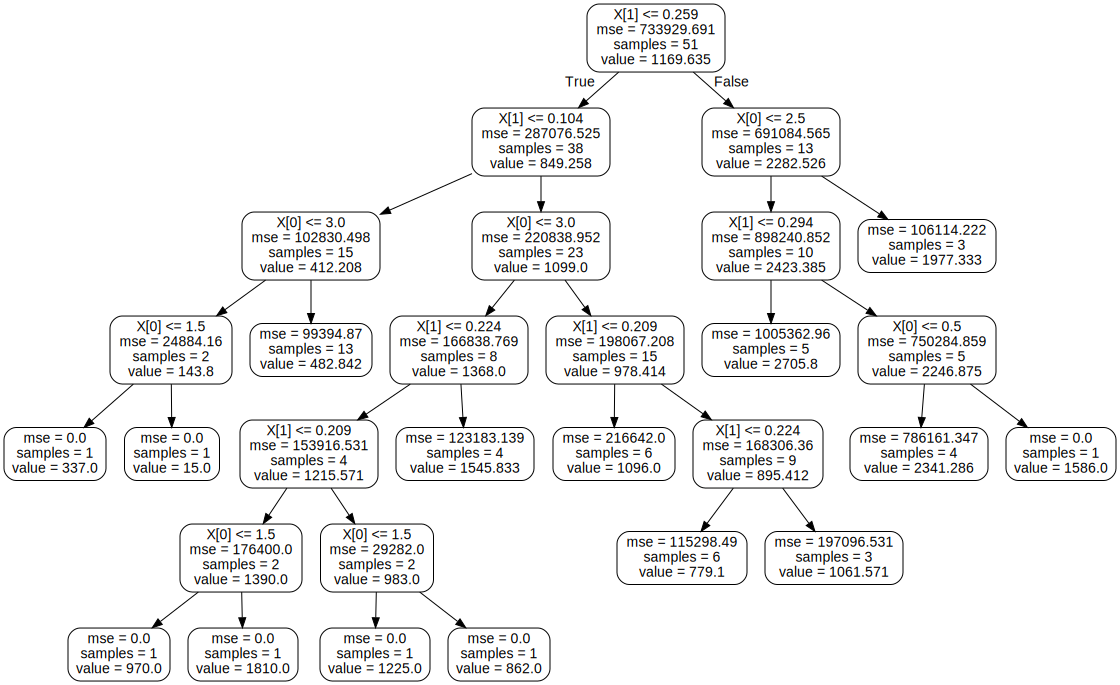

In [72]:
dot_data_RF = export_graphviz(decision_tree=model_Rf.estimators_[1], rounded=True)
graph_RF = graphviz.Source(dot_data_RF, format="png")
graph_RF

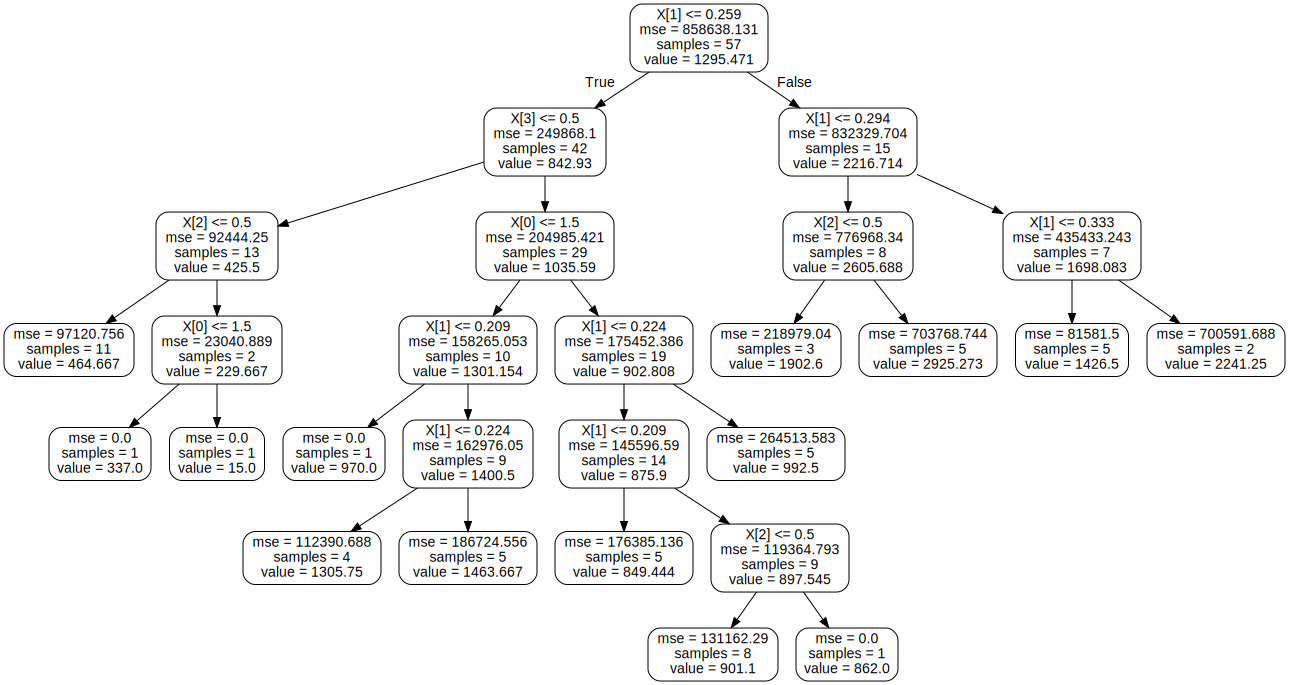

In [73]:
dot_data_RF = export_graphviz(decision_tree=model_Rf.estimators_[2], rounded=True)
graph_RF = graphviz.Source(dot_data_RF, format="png")
graph_RF

In [ ]:
graph_RF.render("dt_tree_RF", format="png")